In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1:].values
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [20]:
# here in svr we have to do frture scalling 
# scaler function take inpute 2d array only
# x is already 2d we have to convert y into 2d
# y = y.reshape(len(y),1)
# instade of what i did in above section you can just add cloun after -1 
# like this: y = df.iloc[:,-1:]

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [27]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

c:\Users\5415\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [34]:
# now lets predect one new data
# we have to sacle our data cause evreything else modal has been traind was is scalled
predection = regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1)
# we should reshape that data so we dont get error 
# it possible we wont get any errors if we dont reshape it but its just good prectice 
# now we have to do the invers of scalling on the result 
final = sc_y.inverse_transform(predection)
final


array([[170370.0204065]])

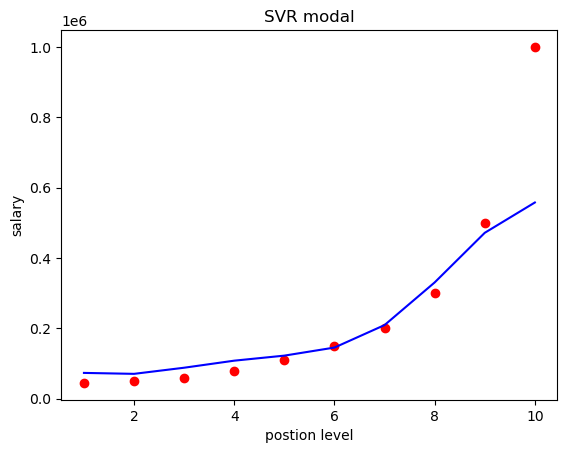

In [37]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color = 'blue')
plt.xlabel('postion level')
plt.ylabel('salary')
plt.title('SVR modal')
plt.show()